In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
division = pd.read_csv('input_DecreaseRate.csv')
subtraction = pd.read_csv('input_microSubtraction.csv')
mix = pd.read_csv('input_mixed_over60%.csv')

*excelのLightGBM解説グラフ作成用*

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
temp1 = subtraction[subtraction.Size < 5][['Size', 'Subtraction']]
temp2 = subtraction[(subtraction.Size >= 5) & (subtraction.Size < 30)][['Size', 'Subtraction']]
temp2.Subtraction -= 12
temp3 = subtraction[(subtraction.Size >= 30) & (subtraction.Size < 65)][['Size', 'Subtraction']]
temp3.Subtraction -= 35
temp4 = subtraction[(subtraction.Size >= 65) & (subtraction.Size < 150)][['Size', 'Subtraction']]
temp4.Subtraction -= 80
temp5 = subtraction[(subtraction.Size >= 150) & (subtraction.Size < 270)][['Size', 'Subtraction']]
temp5.Subtraction -= 150

In [75]:
all_sub = pd.concat([temp1, temp2, temp3, temp4, temp5])

In [76]:
all_sub.to_csv('for_lightGBM_graph.csv', index=False)

In [77]:
temp6 = all_sub[all_sub.Size < 5]
temp6.Subtraction -= 2
temp7 = all_sub[(all_sub.Size >= 5) & (all_sub.Size < 17)]
temp7.Subtraction -= -8
temp8 = all_sub[(all_sub.Size >= 17) & (all_sub.Size < 30)]
temp8.Subtraction -= 7
temp9 = all_sub[(all_sub.Size >= 30) & (all_sub.Size < 45)]
temp9.Subtraction -= -15
temp10 = all_sub[(all_sub.Size >= 45) & (all_sub.Size < 63)]
temp10.Subtraction -= 10
temp11 = all_sub[(all_sub.Size >= 63) & (all_sub.Size < 135)]
temp11.Subtraction -= -10
temp12 = all_sub[(all_sub.Size >= 135) & (all_sub.Size < 160)]
temp12.Subtraction -= 50
temp13 = all_sub[(all_sub.Size >= 160) & (all_sub.Size < 210)]
temp13.Subtraction -= -30
temp14 = all_sub[(all_sub.Size >= 210) & (all_sub.Size < 270)]
temp14.Subtraction -= 50

In [78]:
all_sub2 = pd.concat([temp6, temp7, temp8, temp9, temp10, temp11, temp12, temp13, temp14])

In [79]:
all_sub2.to_csv('for_lightGBM_graph2.csv', index=False)

In [6]:
subtraction.head()

,Strain,Orien,Aspect,Size,Subtraction
0,1,4,0.589215,203.32,117.53
1,2,4,0.290944,15.91,13.29
2,3,1,0.256198,257.93,202.06
3,2,4,0.120000,84.60,52.88
4,2,2,0.340909,21.04,18.55


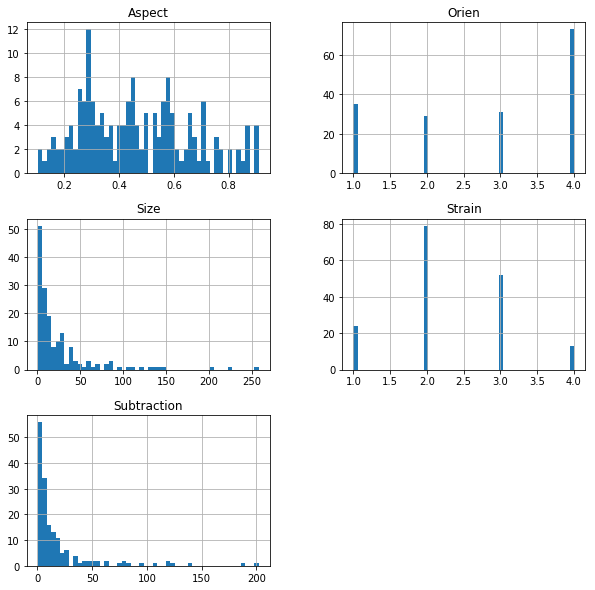

In [11]:
subtraction.hist(bins=50, figsize=(10,10))
plt.show()

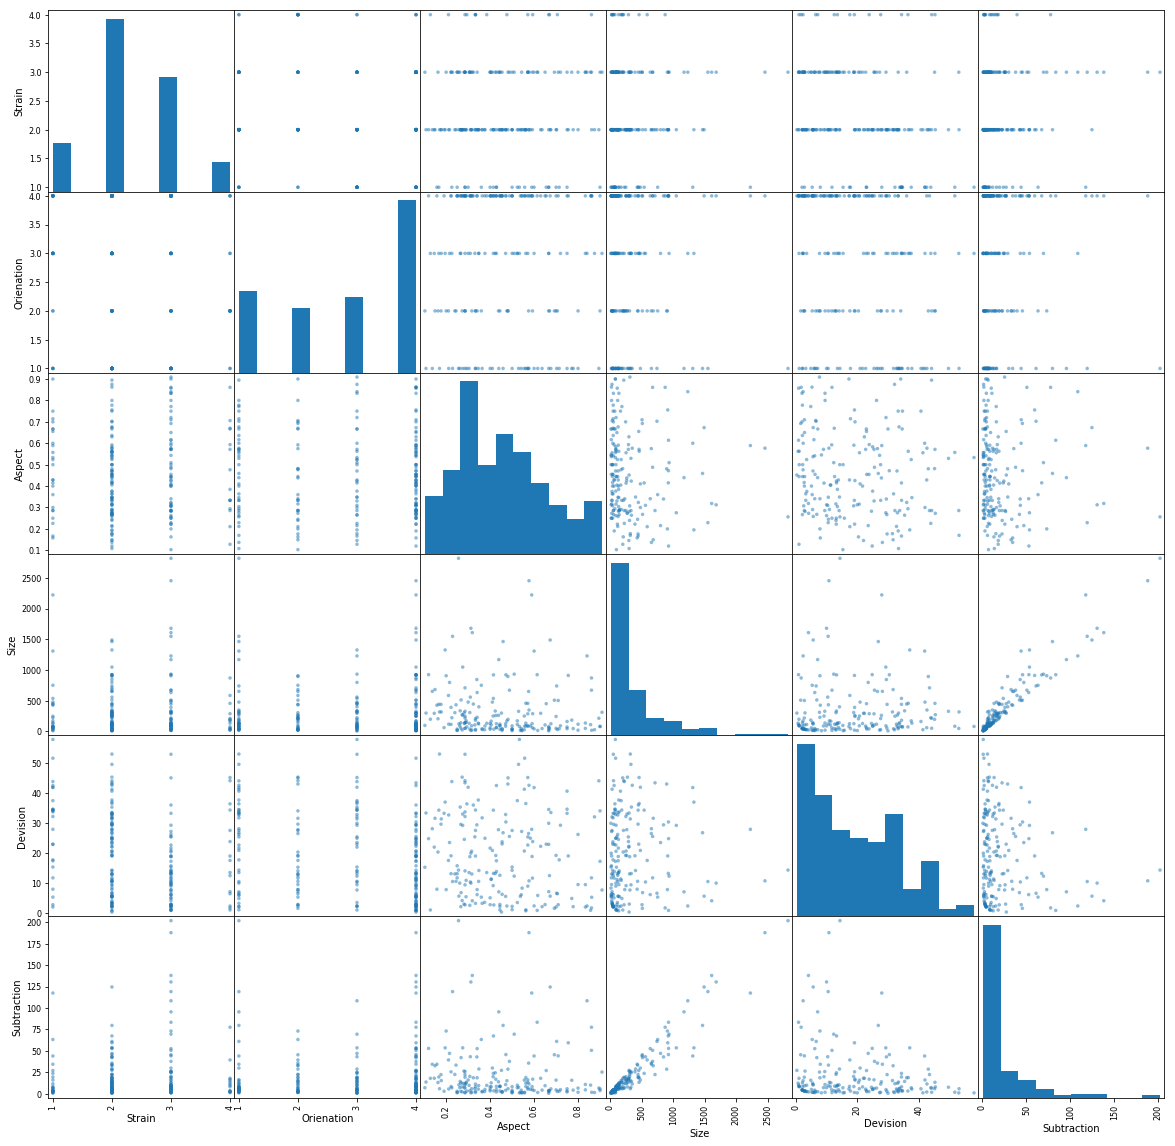

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(mix, figsize=(20,20), s=50)
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()
material_std = sc.fit_transform(material)
material_std = pd.DataFrame(materials_std)

ms = MinMaxScaler()
material_norm = ms.fit_transform(material)
material_norm = pd.DataFrame(material_norm)

material_std.columns = ['Strain', 'Orien', 'Aspect','Size','Decrease']
material_norm.columns = ['Strain', 'Orien', 'Aspect','Size','Decrease']

NameError: name 'material' is not defined

In [ ]:
subtraction.columns

In [ ]:
corr_matrix = subtraction.corr()
corr_matrix['Subtraction'].sort_values(ascending=False)

In [ ]:
corr_matrix = mix.corr()
corr_matrix['Subtraction'].sort_values(ascending=False)

In [ ]:
material_modi = material_norm.copy()
material_modi[(material_modi['Size'] > 0.65)]
material_modi[(material_modi['Size'] > 0.65)]['Size'].sort_values()

In [ ]:
material_modi.iloc[:,3][material_modi.iloc[:,3] > 0.65] = 0.6
material_modi['Size'].hist(bins=50, figsize=(10,10))
plt.show()

In [ ]:
material_modi.hist(bins=50, figsize=(10,10))
plt.show()

In [ ]:
material_modi.to_csv('data_for_waka_modified.csv', index=False)

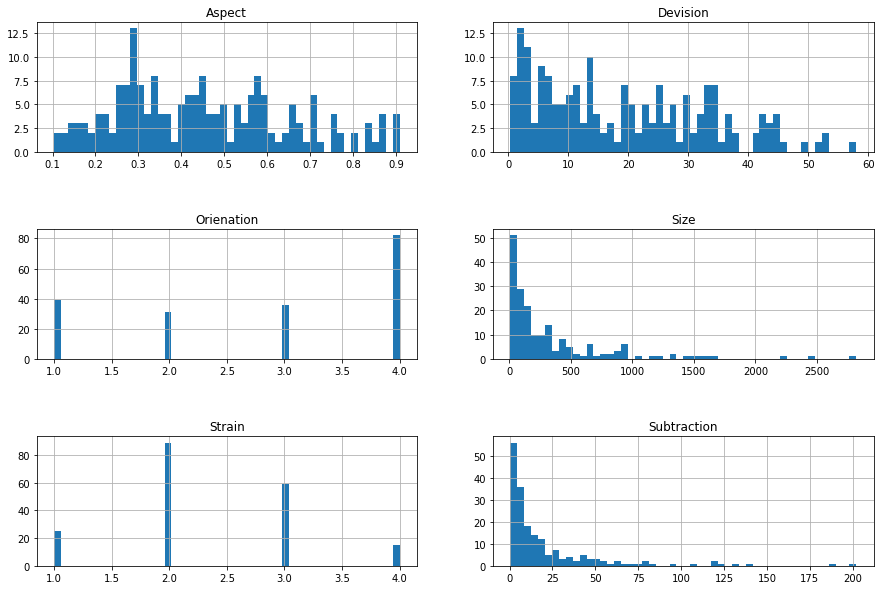

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

mix.hist(bins=50, figsize=(15,10))
plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()

In [15]:
mix_micro = mix.copy()
mix_micro['Size'] = mix_micro['Size'] * 0.091463415

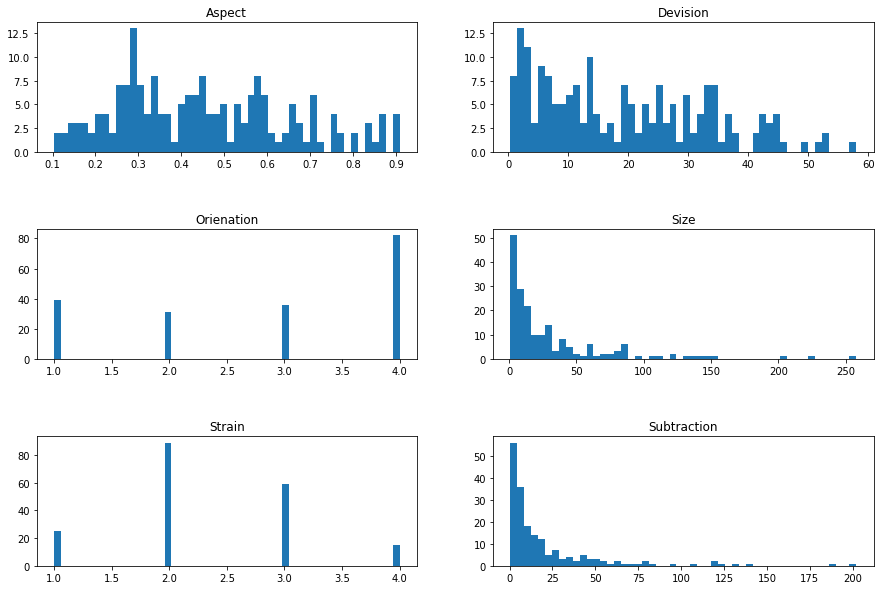

In [23]:
mix_micro.hist(bins=50, figsize=(15,10), grid=False)
plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()

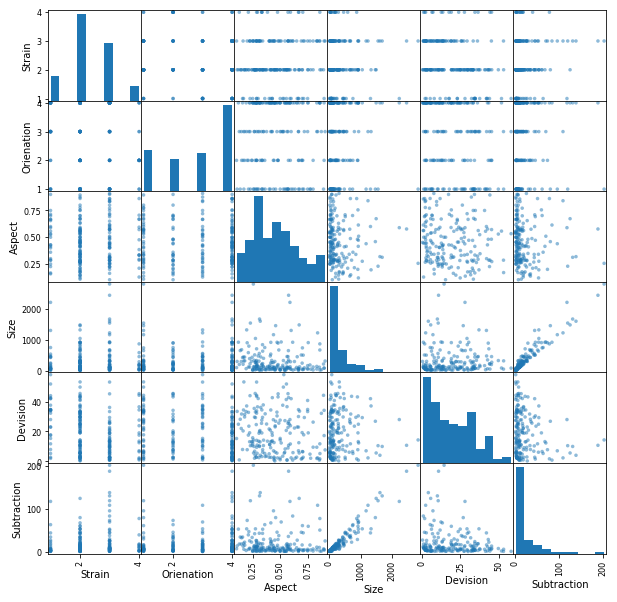

In [17]:
from pandas.plotting import scatter_matrix

scatter_matrix(mix, figsize=(10,10), s=50)
plt.show()

In [18]:
corr_matrix2 = mix.corr()
corr_matrix2['Subtraction'].sort_values(ascending=False)

Subtraction    1.000000
Size           0.958543
Strain         0.109968
Orienation     0.040946
Aspect        -0.041678
Devision      -0.169690
Name: Subtraction, dtype: float64